In [1]:
import csv
import codecs
import os
import fileinput
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [2]:
revenue = pd.read_csv('D:/ISB/Term1/PRAT2/nycgc_revenue.csv',parse_dates=[0])

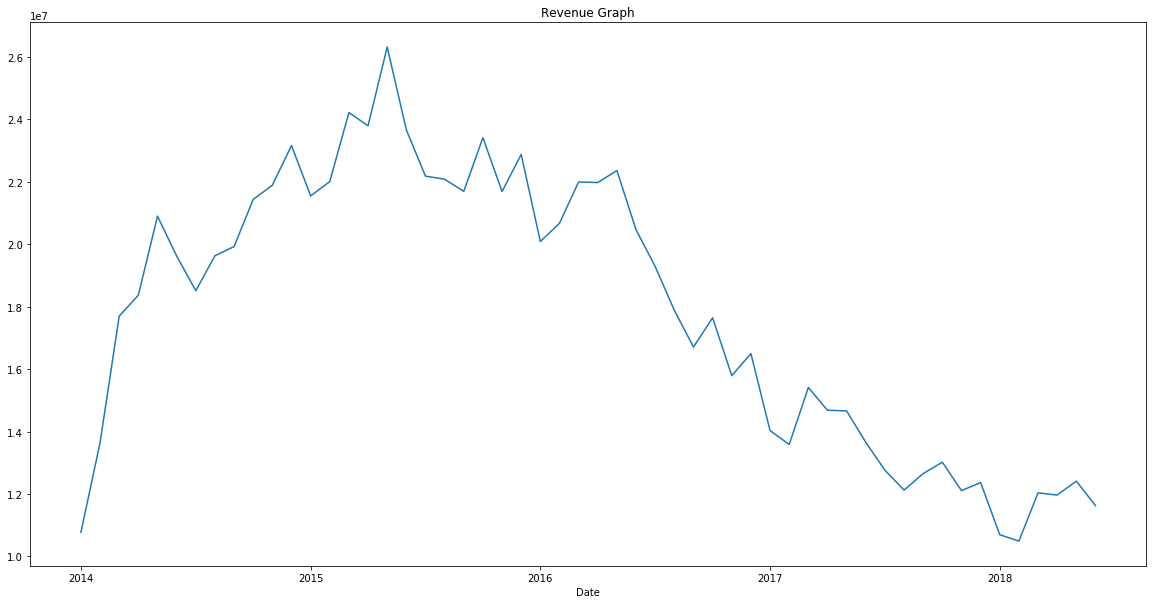

In [3]:
import matplotlib.pyplot as plt
ax1 = plt.subplots()

revenue.set_index(['Date'],inplace=True)
ax1 = revenue['Revenue'].plot(figsize=(20,10))
plt.setp(ax1.xaxis.get_label(), visible=True, text='Date')
plt.setp(ax1.get_xticklabels(), visible=True)
plt.minorticks_off()
plt.title("Revenue Graph")
#plt.xticks(range('06-2013','08-2018'))
plt.show()

<Figure size 432x288 with 0 Axes>

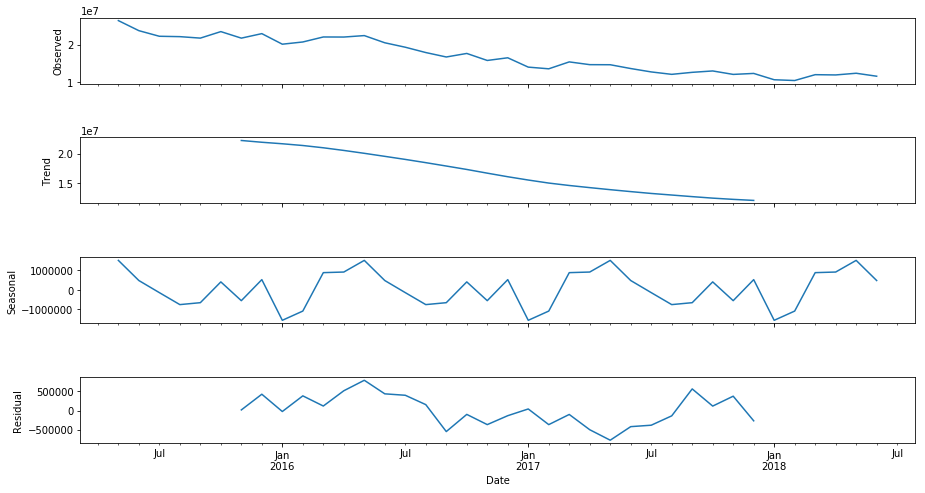

In [4]:
backup=revenue
revenue1=revenue[revenue.index >= '2015-05-01']
#ms1=ms1.set_index(pd.DatetimeIndex(ms1['month']))
decomposition = seasonal_decompose(revenue1['Revenue'],freq=12)  

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [5]:
revenue_train = revenue[(revenue.index >= '2015-05-01') & (revenue.index <= '2018-06-01')]

In [6]:
from sklearn.metrics import mean_squared_error
import itertools

from math import sqrt

results_df = pd.DataFrame(columns=['pdq', 'seasonal_pdq', 'aic', 'rmse'])

index_rad=0

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(revenue_train['Revenue'],
                                            order=param,trend='n',
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            revenue_train['forecast_revenue'] = results.predict(start='2015-05-01',dynamic=True)  
            rmse = sqrt(mean_squared_error(revenue_train['2015-05-01':]['Revenue'], revenue_train['2015-05-01':]['forecast_revenue']))
            print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(param, param_seasonal, results.aic,rmse))
            results_df.loc[index_rad] = [param,param_seasonal,results.aic,rmse]
            index_rad = index_rad+1
        except:
            print('Is this failing??')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1340.224327893208 - RMSE:17574380.81971537
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5846380959.838717 - RMSE:17574380.81971537
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:847.447297239164 - RMSE:17574380.81971537
Is this failing??
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:813.2674291786249 - RMSE:17574380.81971537
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:34793.7726404824 - RMSE:17574380.81971537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:458.306013773332 - RMSE:17574380.81971537
Is this failing??
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1279.651118772468 - RMSE:17574380.81971537
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5286820529.652197 - RMSE:17574380.81971537
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:800.744729190744 - RMSE:17574380.81971537
Is this failing??
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:918.5681803330863 - RMSE:17574380.81971537
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:850.308286813724 - RMSE:17574380.81971537
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:466.58545307100525 - RMSE:17574380

In [7]:
results_df = results_df.sort_values('aic')
results_df.head(5)

,pdq,seasonal_pdq,aic,rmse
47,"(1, 1, 1)","(1, 1, 0, 12)",357.554790,1.757438e+07
41,"(1, 1, 0)","(1, 1, 0, 12)",360.533350,1.757438e+07
35,"(1, 0, 1)","(1, 1, 0, 12)",386.977823,1.757438e+07
29,"(1, 0, 0)","(1, 1, 0, 12)",388.140430,1.757438e+07
23,"(0, 1, 1)","(1, 1, 0, 12)",389.849642,1.757438e+07


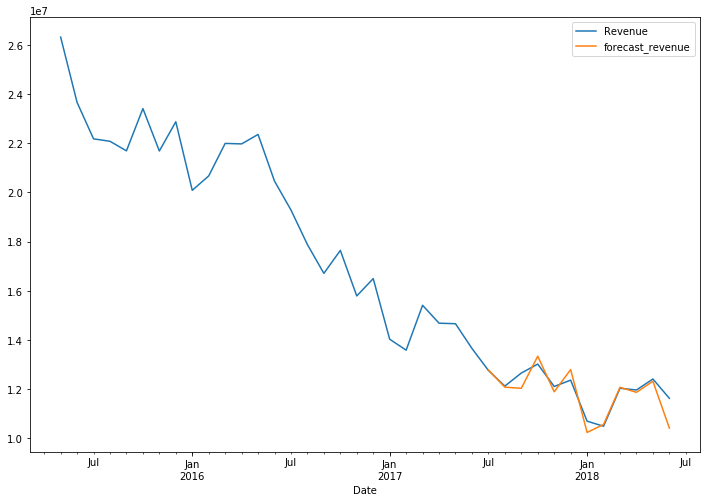

In [13]:
mod = sm.tsa.statespace.SARIMAX(revenue_train['Revenue'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

revenue_train['forecast_revenue'] = results.predict(start='2017-07-01',end='2018-06-01',dynamic=True)  

revenue_train[['Revenue', 'forecast_revenue']].plot(figsize=(12, 8)) 

In [9]:
sqrt(mean_squared_error(revenue_train['2017-07-01':]['Revenue'], revenue_train['2017-07-01':]['forecast_revenue']))

449032.91112143506

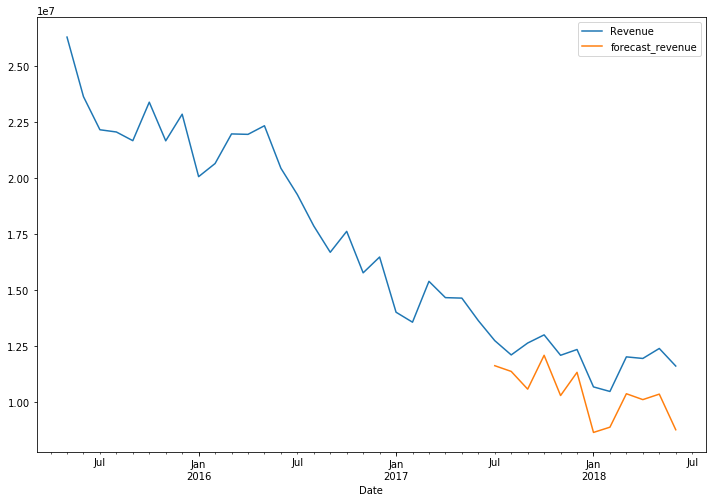

In [10]:
mod = sm.tsa.statespace.SARIMAX(revenue_train['Revenue'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

revenue_train['forecast_revenue'] = results.predict(start='2017-07-01',end='2018-06-01',dynamic=True)  

revenue_train[['Revenue', 'forecast_revenue']].plot(figsize=(12, 8)) 

In [11]:
sqrt(mean_squared_error(revenue_train['2017-07-01':]['Revenue'], revenue_train['2017-07-01':]['forecast_revenue']))

1735440.989153031

In [14]:
results.predict(start='2018-07-01',end='2018-12-01',dynamic=True)  

2018-07-01    9.454963e+06
2018-08-01    8.976744e+06
2018-09-01    7.231948e+06
2018-10-01    8.723105e+06
2018-11-01    6.443434e+06
2018-12-01    7.538705e+06
Freq: MS, dtype: float64